# CSCI 0451: Replication Study: Dissecting racial bias in an algorithm used to manage the health of populations


### Abstract

This post is an exploration of the findings of the paper, "Dissecting racial bias in an algorithm used to manage the health of populations." It explores the implications of racial bias in healthcare algorithms and the potential consequences of using these algorithms in practice. The paper highlights the importance of understanding the biases present in these algorithms and the need for more research to address these issues. I will replicate some of the findings of the paper and provide a critical analysis of the results.


### Part A: Data Access

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

In [3]:
# Exploring the data
df.head()

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1


In [4]:
# look at important columns: risk_score_t, cost_t, race, and gagne_sum_t
df2 = df[['risk_score_t', 'cost_t', 'race', 'gagne_sum_t']].copy()
df2.head()


,risk_score_t,cost_t,race,gagne_sum_t
0,1.987430,1200.0,white,0
1,7.677934,2600.0,white,3
2,0.407678,500.0,white,0
3,0.798369,1300.0,white,0
4,17.513165,1100.0,white,1


race
white    43202
black     5582
Name: count, dtype: int64


c:\Users\julia\anaconda3\envs\ML-2000\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julia\anaconda3\envs\ML-2000\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\julia\anaconda3\envs\ML-2000\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


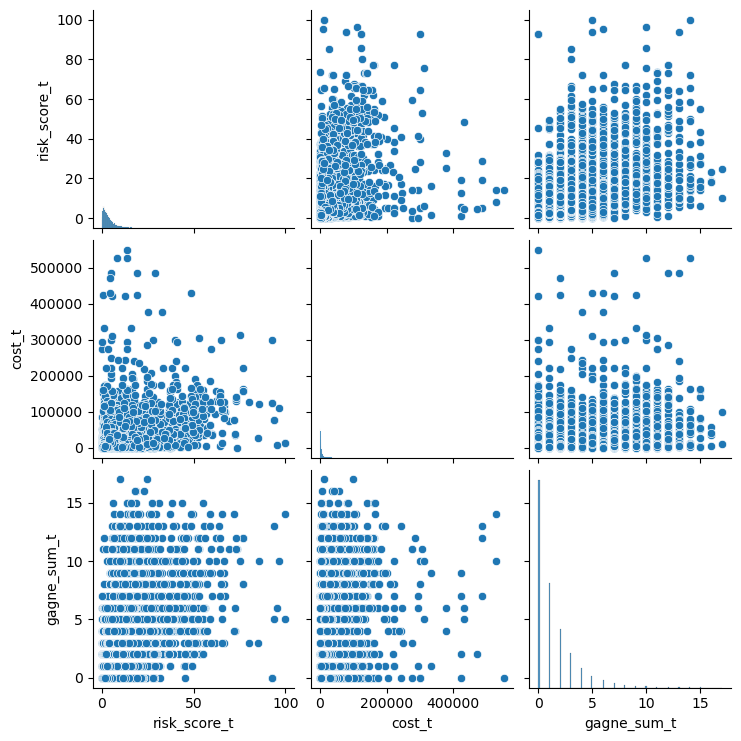

In [5]:
# graphing the data
import matplotlib.pyplot as plt
import seaborn as sns

# print number of black and white patients
print(df2['race'].value_counts())

# plot the data
sns.pairplot(df2)



### Part B: Reproduce Figure 1

This figure visualizes risk score percentiles against mean number of active chronic conditions for black and white patients.

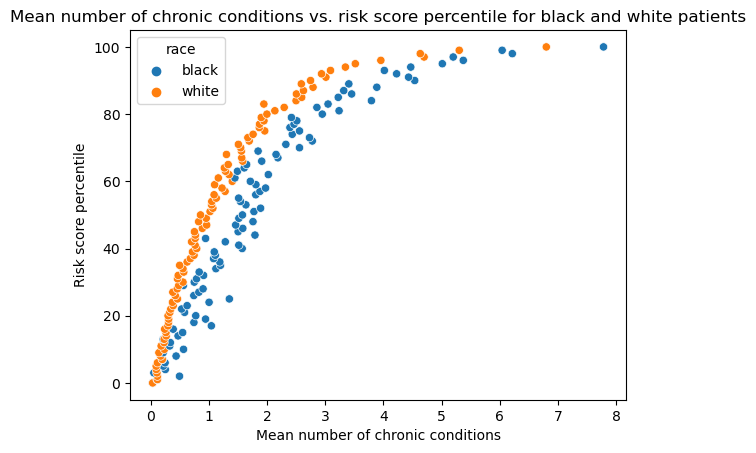

In [15]:
# graph risk score percentiles against mean number of active chronic conditions for black and white patients

# get the percentiles
df2['risk_score_percentile'] = round(df['risk_score_t'].rank(pct=True), 2) * 100

# get the mean number of active chronic conditions and reset the index
df3 = df2.groupby(['risk_score_percentile','race'])['gagne_sum_t'].mean()

df3 = pd.DataFrame(df3)

# plot the data
sns.scatterplot(data=df3, y='risk_score_percentile', x='gagne_sum_t', hue = 'race')
plt.xlabel('Mean number of chronic conditions')
plt.ylabel('Risk score percentile')
plt.title('Mean number of chronic conditions vs. risk score percentile for black and white patients')
plt.show()


This plot demonstrates the racial bias present in the risk score algorithm. The risk scores for black patients are consistently higher than those for white patients, even when the number of active chronic conditions is the same. This indicates that the algorithm is biased against black patients, assigning them higher risk scores than white patients with the same health conditions.

### Part C: Reproduce Figure 3

This figure visualizes how total medical expenditures are correlated with the risk score and with the number of chronic health conditions using two panels. The first panel plots total medical expenditure against percentile risk score and the second panel plots total medical expenditure against the number of chronic conditions.

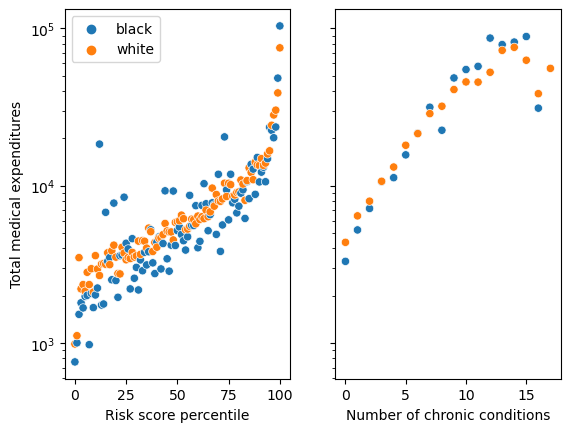

In [46]:
# This figure visualizes how total medical expenditures are correlated with the risk score and with the number of chronic health conditions using two panels. The first panel plots total medical expenditure against percentile risk score and the second panel plots total medical expenditure against the number of chronic conditions.

# get the mean total medical expenditures
df4 = pd.DataFrame(df2.groupby(['risk_score_percentile','race'])['cost_t'].mean())
df5 = pd.DataFrame(df2.groupby(['gagne_sum_t','race'])['cost_t'].mean())

# plot the data
fig, axs = plt.subplots(1, 2, sharey=True)

sns.scatterplot(data=df4, x='risk_score_percentile', y='cost_t', hue = 'race', ax=axs[0])
sns.scatterplot(data=df5, x='gagne_sum_t', y='cost_t', hue='race', ax=axs[1])

# set labels
axs[0].set_xlabel('Risk score percentile')
axs[0].set_ylabel('Total medical expenditures')
axs[1].set_xlabel('Number of chronic conditions')

# legend stuff
axs[0].legend(loc='upper left')
axs[1].legend().remove()

plt.yscale('log')
plt.show()

These plots demonstrate that total medical expenditures increase with higher risk scores and a greater number of chronic conditions. However, black patients with the same risk score had lower medical expenditures than white patients, indicating that the algorithm may be underestimating the healthcare needs of black patients. Interestingly, it appears black patients make up a large portion of the outliers in the first panel, indicating that in instances where they pay more than white patients, they tend to pay much more. This could be also indicate that the risk algorithm is poorly tuned for black patients.

### Part D: Modeling Cost Disparity

In [48]:
# determine the percentage of patients in the data with 5 or fewer chronic conditions
df6 = df2[df2['gagne_sum_t'] <= 5]
percentage = len(df6)/len(df2)*100
print("Percentage of patients with 5 or fewer chronic conditions: ", percentage)

Percentage of patients with 5 or fewer chronic conditions:  95.53952115447689


This percentage does indicate that we should focus on patients with 5 or fewer chronic conditions, as they make up the majority of the population. However, we need to be careful not to ignore patients with more chronic conditions in later stages of the analysis, as they may have higher medical expenditures and require more attention.

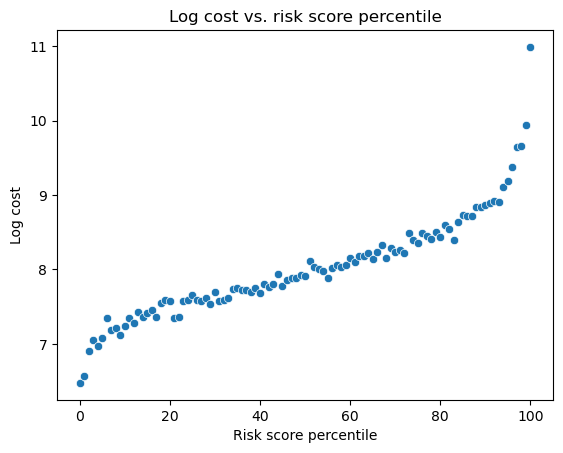

In [57]:
# Create a new column of the data set which is just the logarithm of the cost. This is called a log-transform. We’ll use this as our target variable. Log transforms are common when the target variable varies widely across several orders of magnitude. Because log(0) is undefined, you should subset the data so that patients who incurred $0 in medical costs are removed.

df2 = df2[df2['cost_t'] > 0]
df2.loc[:, 'log_cost'] = df2['cost_t'].apply(lambda x: np.log(x))

# replace inf values with NaN
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

# graph log cost against risk score percentile
df7 = pd.DataFrame(df2.groupby(['risk_score_percentile'])['log_cost'].mean())
sns.scatterplot(data=df7, x='risk_score_percentile', y='log_cost')
plt.xlabel('Risk score percentile')
plt.ylabel('Log cost')
plt.title('Log cost vs. risk score percentile')
plt.show()


In [64]:
# Create a dummy (one-hot encoded) column for the qualitative race variable in which 0 means that the patient is white and 1 means that the patient is Black
df2.loc[:,'race_dummy'] = df2['race'].apply(lambda x: 1 if x == 'black' else 0)

df2.head(15)

,risk_score_t,cost_t,race,gagne_sum_t,risk_score_percentile,log_cost,race_dummy
0,1.987430,1200.0,white,0,35.0,7.090077,0
1,7.677934,2600.0,white,3,86.0,7.863267,0
2,0.407678,500.0,white,0,4.0,6.214608,0
3,0.798369,1300.0,white,0,11.0,7.170120,0
4,17.513165,1100.0,white,1,98.0,7.003065,0
5,4.450484,123700.0,white,1,68.0,11.725615,0
6,4.195685,12900.0,white,1,66.0,9.464983,0
7,0.713436,3900.0,white,0,10.0,8.268732,0
8,1.087141,1000.0,black,1,18.0,6.907755,1
9,0.832342,200.0,white,0,12.0,5.298317,0


In [69]:
# Separate the data into predictor variables X and target variable y (the log-cost). For predictor variables, just use the dummy columns for race and the number of active chronic conditions.

X = df2[['race_dummy', 'gagne_sum_t', 'risk_score_percentile', 'risk_score_t']]
y = df2['log_cost']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

LR = LinearRegression()
LR.fit(X, y)

# add polynomial features
def add_polynomial_features(X, degree):
  X_ = X.copy()
  for j in range(1, degree):
    X_[f"poly_{j}"] = X_["gagne_sum_t"]**j
  return X_

# loop through polynomial features of varying degrees using add_polynomial_features and cross_val_score to determine the best degree
max_score = 0
for i in range(1, 25):
  X_ = add_polynomial_features(X, i)
  scores = cross_val_score(LR.fit(X_, y), X_, y, cv=5).mean()
  print(f"Degree {i}: {scores.mean()}") 
  if scores > max_score:
    max_score = scores
    best_degree = i

print(f"Best degree: {best_degree} at {max_score}")






Degree 1: 0.25539613788482207
Degree 2: 0.25539613788482207
Degree 3: 0.25564888929939117
Degree 4: 0.25609938363207574
Degree 5: 0.25607069827694195
Degree 6: 0.25625955333137707
Degree 7: 0.2564252446267551
Degree 8: 0.25640003372393394
Degree 9: 0.2564242169488689
Degree 10: 0.2564533053746847
Degree 11: 0.25639384376814056
Degree 12: 0.2563983605338217
Degree 13: 0.25635481290198764
Degree 14: 0.25626679553993736
Degree 15: 0.25465260347421387
Degree 16: 0.24480386175973914
Degree 17: 0.12346457985251931
Degree 18: 0.10911644750197495
Degree 19: 0.10944262978112854
Degree 20: 0.11049373279577526
Degree 21: 0.11000738094929408
Degree 22: 0.10855748113346249
Degree 23: 0.11429892205035311
Degree 24: 0.10851654074884584
Best degree: 10 at 0.2564533053746847


The polynomial with degree 10 had the maximum cross validation score at .2564. 

In [70]:
# construct a copy of the data with this correct number of polynomial features and fit one last linear regression model

X_ = add_polynomial_features(X, best_degree)
LR.fit(X_, y)

# get the coefficients
coefficients = LR.coef_
print(coefficients)


[-1.94142978e-01  2.22302356e-01  1.38644478e-02  3.72898504e-02
  2.22302370e-01 -6.38916760e-01  3.80208341e-01 -1.14270884e-01
  1.98729469e-02 -2.07784555e-03  1.28373619e-04 -4.30575642e-06
  6.03040560e-08]


The weight corresponding with race is the first weight in the list, which is -1.94142978e-01.

In [73]:
# calculate e^(w_b)

e_wb = np.exp(coefficients[0])
print(e_wb)



0.8235401479795127


Based on the results of the model, black patients pay, on average, about 82.3% of what white patients pay on healthcare. Black patients paying less than their white counterparts supports the paper's argument that black patients receive less healthcare on average, despite having similar numbers of chronic conditions.

### Conclusion

This blog post has allowed me to replicate some of the findings of a vastly important and relevant paper in the field of healthcare algorithms. The results of the analysis demonstrate the presence of racial bias in the risk score algorithm and its impact on healthcare expenditures. The findings highlight the need for further research to address these biases and ensure that healthcare algorithms are fair and equitable for all patients, regardless of race. The paper provides valuable insights into the implications of racial bias in healthcare algorithms and the potential consequences for patient care, stressing the need for unbiased algorithms that provide equitable care suggestions for all patients.

The criteria best describing the purported bias of the algorithm studied by Obermeyer et al. (2019) are risk score accuracy and fairness. The algorithm assigns higher risk scores to black patients than white patients with the same health conditions, indicating that it is not accurate in predicting generalized healthcare needs. This inaccuracy leads to disparities in healthcare expenditures between black and white patients, which is unfair and discriminatory. The study provides evidence of these disparities through visualizations and statistical analysis, demonstrating the impact of racial bias on patient care. The findings of the study highlight the importance of addressing these biases and developing algorithms that are accurate and fair for all patients, regardless of race.